In [1]:
%matplotlib inline


In [2]:
import numpy as np
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import matplotlib.animation
import tsa_utils
#import png
import tensorflow as tf
import pickle
import cv2
import skimage
import pandas as pd 
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale as sknorm
from sklearn.preprocessing import scale

In [3]:
#Model parameters
DATA_PATH="../tsa_data/images/"
CHECKPOINT_PATH="../tsa_data/multi_class/"
MODEL_ID="pca6"

tf.logging.set_verbosity(tf.logging.INFO)
# pca_model = pickle.load(open("../tsa_data/pca_models/medium_safe_pca.p","rb"))


In [4]:
matplotlib.rc('animation', html='html5')

def plot_image(path):
    data = tsa_utils.read_data(path)
    fig = mpl.pyplot.figure(figsize = (16,16))
    ax = fig.add_subplot(111)
    def animate(i):
        im = ax.imshow(np.flipud(data[:,:,i].transpose()), cmap = 'viridis')
        return [im]
    return matplotlib.animation.FuncAnimation(fig, animate, frames=range(0,data.shape[2]), interval=200, blit=True)

In [5]:
import random


In [6]:
def spread_spectrum(img):
    #img = stats.threshold(img, threshmin=12, newval=0)
    # see http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img= clahe.apply(img)
    
    return img

In [7]:
data =tsa_utils.read_data("../tsa_data/images/0a83698bce92a6824dcc37c1d7fc31f5reverse.aps", normalize=True)

In [8]:
data.max()


10.106182

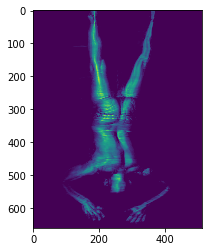

In [9]:
plt.imshow(data[6])

In [9]:
normed = sknorm([newImage0.flatten()], axis=1, feature_range=(-1,1))

NameError: name 'newImage0' is not defined

In [70]:
normed = normed.reshape(-1, 660, 512)

In [13]:
maxIntensity=1

In [40]:
newImage0.mean()

0.046476042072096088

In [76]:
# Parameters for manipulating image data
phi = 1
theta = 1

# Increase intensity such that
# dark pixels become much brighter, 
# bright pixels become slightly bright
newImage0 = (maxIntensity/phi)*(data/(maxIntensity/theta))**1.5

#newImage0 = np.array(newImage0,dtype=np.uint8)

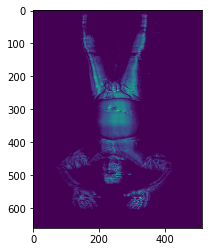

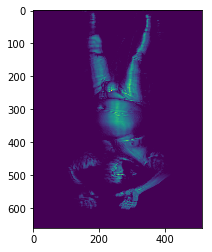

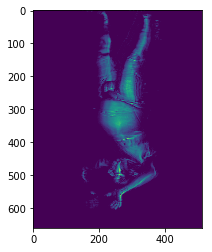

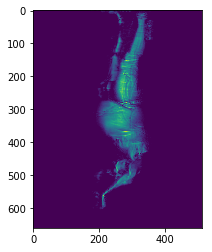

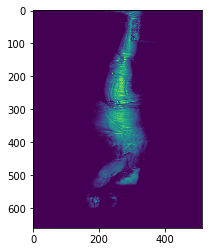

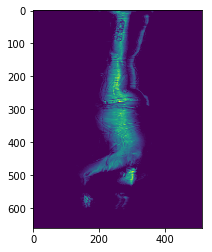

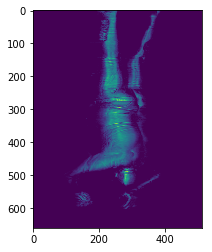

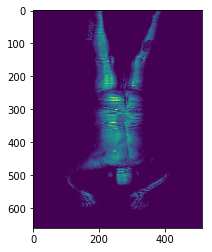

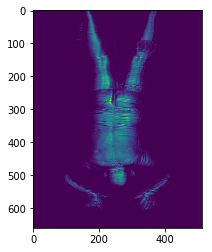

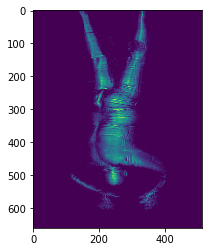

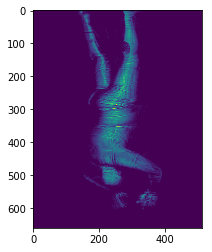

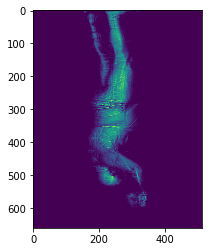

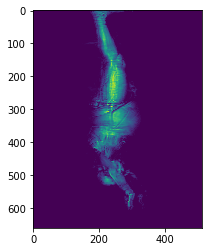

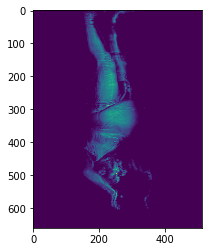

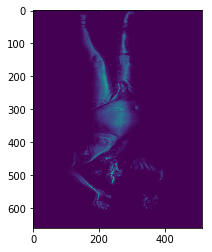

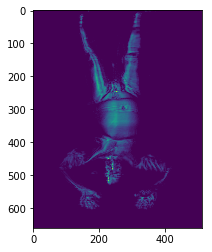

In [45]:
data =tsa_utils.read_data("../tsa_data/images/08dc52d08482393070d8c71b11902636.aps", normalize=True)
transformed_data = []
for i in range(0,16):
#     print(data[i,:,:].shape)
#     plt.imshow(data[i,:,:])
#     print(data.shape)
#     plt.show()
#     print(data2[i,:,:].shape)
#     plt.imshow(data2[i,:,:])
#     print(data2.shape)
#     plt.show()
        plt.imshow(data[i,:,:])
        plt.show()

In [72]:
data

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

In [7]:
gs_iterator = tsa_utils.GrayscaleImagesIterator(['0b2996d90c7250a3acb63cab6ae5bebe'], DATA_PATH, repeating=False, pool_size=2, format=".a3daps")

TypeError: __init__() got an unexpected keyword argument 'format'

In [8]:
iterator = tsa_utils.ScaledImagesIterator(['0b2996d90c7250a3acb63cab6ae5bebe','0b2996d90c7250a3acb63cab6ae5bebereverse','08dc52d08482393070d8c71b11902636','08dc52d08482393070d8c71b11902636reverse'], "../tsa_data/images/", repeating=True, pool_size=2, randomize=True, seed=191)

WRITING CACHE
USING CACHE
WRITING CACHE
USING CACHE


In [5]:
label_iterator = tsa_utils.InputLabelsIterator(['0b2996d90c7250a3acb63cab6ae5bebe','0b2996d90c7250a3acb63cab6ae5bebereverse','08dc52d08482393070d8c71b11902636','08dc52d08482393070d8c71b11902636reverse'],['0b2996d90c7250a3acb63cab6ae5bebe','0b2996d90c7250a3acb63cab6ae5bebereverse','08dc52d08482393070d8c71b11902636','08dc52d08482393070d8c71b11902636reverse'], randomize=True, seed=191)

In [6]:
sampled_iterator = tsa_utils.InputImagesIterator(['0b2996d90c7250a3acb63cab6ae5bebe','0b2996d90c7250a3acb63cab6ae5bebereverse','08dc52d08482393070d8c71b11902636','08dc52d08482393070d8c71b11902636reverse'], DATA_PATH, repeating=True, pool_size=2, file_format=".a3daps")

In [13]:
import random
random.seed(111)

In [41]:
x= tsa_utils.InputImagesIterator(train_ids, DATA_PATH, repeating=True, pool_size=2, randomize=True, seed=1911, file_format=".aps", normalize=True)
y=tsa_utils.InputLabelsIterator(train_ids, train_labels, randomize=True, seed=1911)


LABEL ITER 1433
LABEL ID [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
1433
IMAGE ID b53eee6d51543953cdc99756df81e3fbreverse


/Users/jasminefeldmann/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


IMG ITER 1433


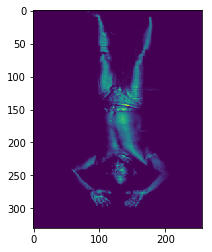

LABEL ITER 2054
LABEL ID [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
2054
IMAGE ID ff4943024cb698b2258abd66fa6d6d62
IMG ITER 2054


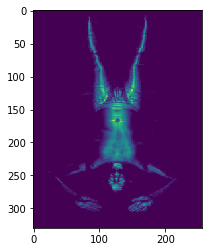

LABEL ITER 15
LABEL ID [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
15
IMAGE ID 0240c8f1e89e855dcd8f1fa6b1e2b944
IMG ITER 15


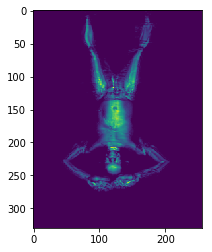

LABEL ITER 1033
LABEL ID [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
1033
IMAGE ID 888577ffe6e13cb4e9c8e4d7b1e4b924reverse
IMG ITER 1033


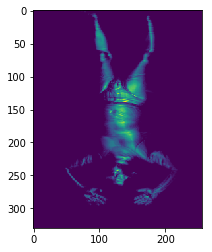

LABEL ITER 767
LABEL ID [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
767
IMAGE ID 689977d04e63fd7d964224568d846906reverse
IMG ITER 767


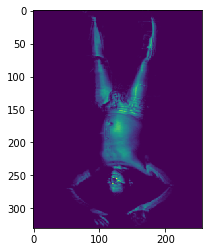

LABEL ITER 1646
LABEL ID [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1646
IMAGE ID cd39e774d22924b0afbfbb600464b2a8
IMG ITER 1646


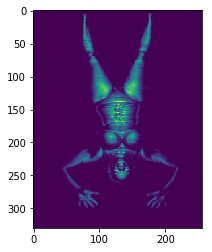

LABEL ITER 384
LABEL ID [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
384
IMAGE ID 3779c7a783d4f0a1787bb161d65213cf
IMG ITER 384


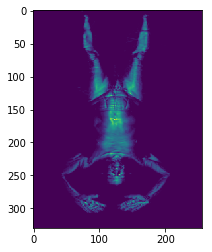

LABEL ITER 924
LABEL ID [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
924
IMAGE ID 7e9a86c3a8979ef95ccce2073552cad6reverse
IMG ITER 924


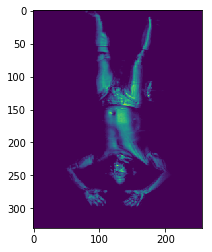

LABEL ITER 370
LABEL ID [1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
370
IMAGE ID 346fc1c788ad7fb4da5a11f3bfb07d28
IMG ITER 370


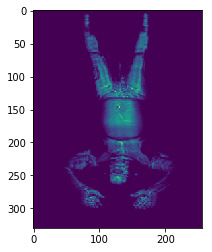

LABEL ITER 655
LABEL ID [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
655
IMAGE ID 5b324aca7de42d0d435c0d7d73225782
IMG ITER 655


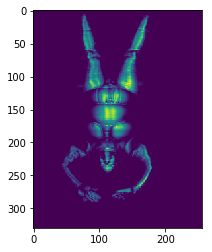

In [42]:
for i in range(0,10):
    print(y.__next__())
    plt.imshow(x.__next__()[0])
    plt.show()

In [17]:
data = x.__next__()


USING CACHE


In [18]:
data.mean()

4.0535859e-05

In [19]:
data.max()

0.00090169313

In [20]:
data.min()

0.0

In [12]:
import time

start = time.time()
DATA_PATH="../tsa_data/images/"
x= tsa_utils.ScaledImagesIterator(train_ids, DATA_PATH, repeating=True, pool_size=2, randomize=True, seed=1911, file_format=".aps", normalize=True)
y=tsa_utils.InputLabelsIterator(train_ids, train_labels, randomize=True, seed=1911)
data = []
for i in range(0,200):
    print(i)
    data.append(x.__next__().flatten())
end = time.time()
print(end - start)

# start = time.time()
# DATA_PATH="../tsa_data/a3dimages/"
# x= tsa_utils.InputImagesIterator(train_ids, DATA_PATH, repeating=True, pool_size=2, randomize=True, seed=1911, file_format=".a3daps", normalize=False)
# y=tsa_utils.InputLabelsIterator(train_ids, train_labels, randomize=True, seed=1911)
# data = []
# for i in range(0,100):
#     print(i)
#     data.append(x.__next__().flatten())
# end = time.time()
# print(end - start)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


KeyboardInterrupt: 

In [170]:
stacked.shape

(200, 1351680)

In [128]:
stacked = np.asarray(data)

In [143]:
stacked[0].shape

(1351680,)

In [160]:
stacked = stacked * 1000

In [100]:
max(stacked[0])

0.92323732

In [145]:
mean.max()

0.00053297559

In [132]:
mean = np.mean(stacked, axis=0)

In [168]:
stacked[0].shape

(1351680,)

In [161]:
std = np.std(stacked, axis=0)

In [162]:
scaled = stacked[0] /  std

/Users/jasminefeldmann/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [163]:
scaled.max()

nan

In [153]:
stacked[0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [154]:
std

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [92]:
std[1037682]

0.16684993

In [105]:
np.argmax(sr)

1037682

In [111]:
stacked = stacked.astype(np.float64)
std= std.astype(np.float64)

In [164]:
scaled = np.true_divide(stacked[0], std, dtype=np.float64)

/Users/jasminefeldmann/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [165]:
scaled.max()

nan

In [166]:

chunk = np.ndarray(stacked[0])

ValueError: sequence too large; cannot be greater than 32

In [167]:
std.max()

0.25546589

In [8]:
tensors_to_log =  {"probabilities": "prob_tensor",
                    "actual":"labels","reg_losses":"reg_losses"}

image_df = pd.read_csv('./stage1_flipped.csv')
image_df['zone'] = image_df['Id'].str.split("_Zone", expand=True)[1].str.strip()
image_df['id'] = image_df['Id'].str.split("_", expand=True)[0].str.strip()

ids = image_df["id"].unique()
ids.sort()
train_ids, test_ids, _, _ = train_test_split(ids, ids, test_size=.1)
train_ids.sort()
test_ids.sort()

train_labels = image_df[image_df['id'].isin(train_ids)]
train_labels.zone = train_labels.zone.astype("int")
train_labels = train_labels.sort_values(["id","zone"])
train_labels = train_labels["Probability"]
train_labels = np.reshape(train_labels, (-1,17))

test_labels = image_df[image_df['id'].isin(test_ids)]
test_labels.zone = test_labels.zone.astype("int")
test_labels = test_labels.sort_values(["id","zone"])
test_labels = test_labels["Probability"]
# test_labels = np.reshape(test_labels, (-1,17))



/Users/jasminefeldmann/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/jasminefeldmann/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [9]:
x=tsa_utils.SampledImagesIterator(train_ids, "../tsa_data/a3dimages/", repeating=True, pool_size=2, file_format=".a3daps", 
                     randomize=True, seed=9011, sample=False)
y=tsa_utils.InputLabelsIterator(train_ids, train_labels, randomize=True, seed=9011)

In [10]:
for i in range(0,1100):
    i = x.__next__()
    j = y.__next__()

KeyboardInterrupt: 

In [21]:
data = x.__next__()

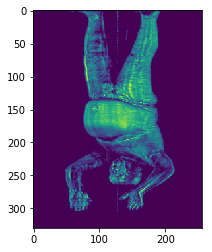

In [22]:
plt.imshow(data[1])

In [40]:
zc2.max()

5.8779931

In [27]:
x = data[0]
zc =  (x - x.mean()) / x.std()

In [36]:
zc2 = (data- data.mean()) / data.std()

In [21]:
# compute the covariance of the image data
cov = np.cov(data[0], rowvar=True)   # cov is (N, N)
# singular value decomposition
U,S,V = np.linalg.svd(cov)     # U is (N, N), S is (N,)
# build the ZCA matrix
epsilon = 1e-5
zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))
# transform the image data       zca_matrix is (N,N)
zca = np.dot(zca_matrix, data[0])    # zca is (N, 3072)

In [17]:
whitened = zca_whitening_matrix(data[0])

In [37]:
data = tsa_utils.read_data("../tsa_data/a3dimages/" +  "08dc52d08482393070d8c71b11902636reverse.a3daps", normalize=True)

/Users/jasminefeldmann/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [28]:
normed = sknorm(data.flatten(), axis=1, feature_range=(-1,1)).reshape(-1, 660, 512)

In [29]:
normed =  scale(data.flatten()).reshape(-1, 660, 512)

/Users/jasminefeldmann/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [32]:
normed.mean()

1.0322441e-07

In [26]:
tsa_utils.flip_image(data).mean()

4.0876861e-05